In [38]:
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [39]:
def color_to_high_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 10_000 else 'black'
    return 'color: %s' % color

In [40]:
print_as_tuple = False

In [41]:
df = pd.DataFrame()
mtus = [23,32,64,128,256]
data_sizes = [20,32,64,128,256,512]
conn_intervals =[36,64,256,1024,2048]
def calc_duration(mtu,data,interval):
    requests_needed = math.ceil(data/mtu)
    connection_interval_time = 1.25 * interval
    return requests_needed * 2 * connection_interval_time

for mtu in mtus:
    for data in data_sizes:
        for interval in conn_intervals:
            duration = calc_duration(mtu,data,interval)
            interval_time = interval*1.25
            if print_as_tuple:
                df = df.append(pd.DataFrame([[mtu,data,(interval,interval_time),duration]],columns=['MTU','Data Size','Connection Interval in (hex,ms)','Duration in ms']))
            else:
                df = df.append(pd.DataFrame([[mtu,data,interval,duration]],columns=['MTU','Data Size','Connection Interval in (hex,ms)','Duration in ms']))
df_original = df.copy()
df = df.pivot(index=["MTU","Data Size"],columns="Connection Interval in (hex,ms)")
df.style.applymap(color_to_high_red)

45
80
320
1280
2560


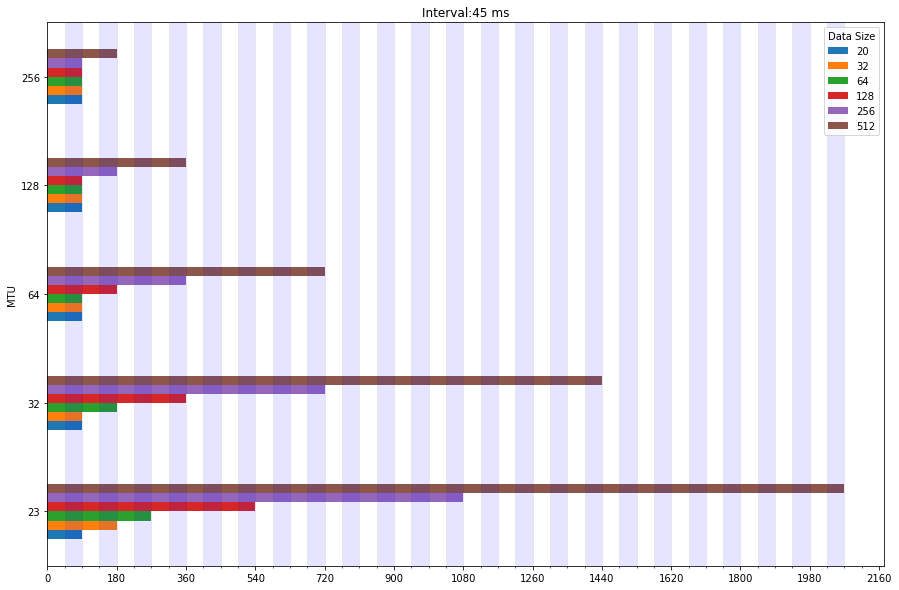

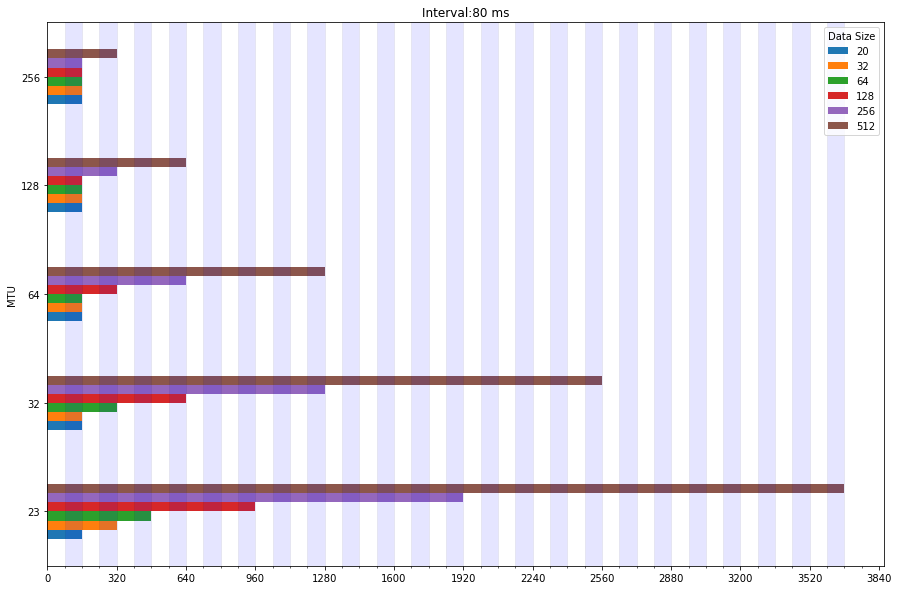

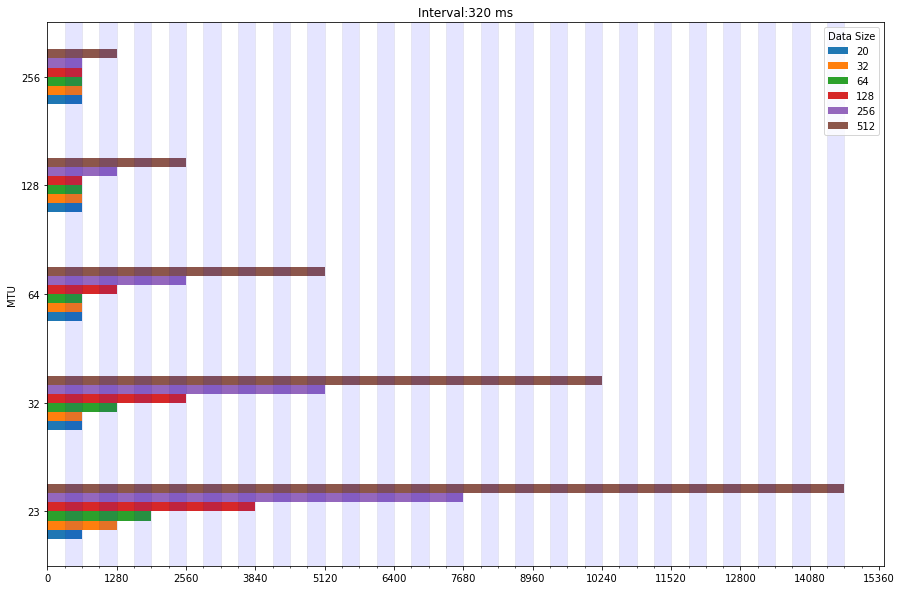

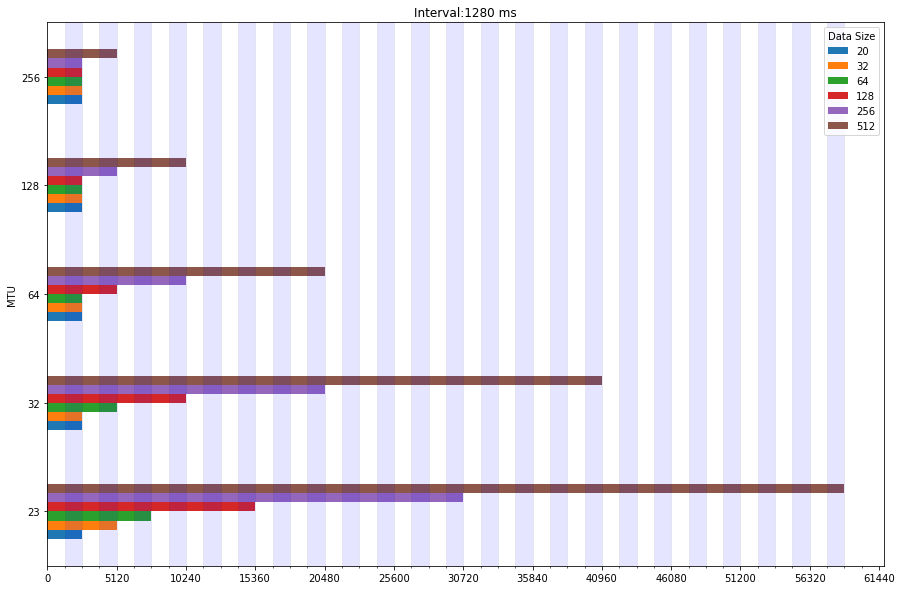

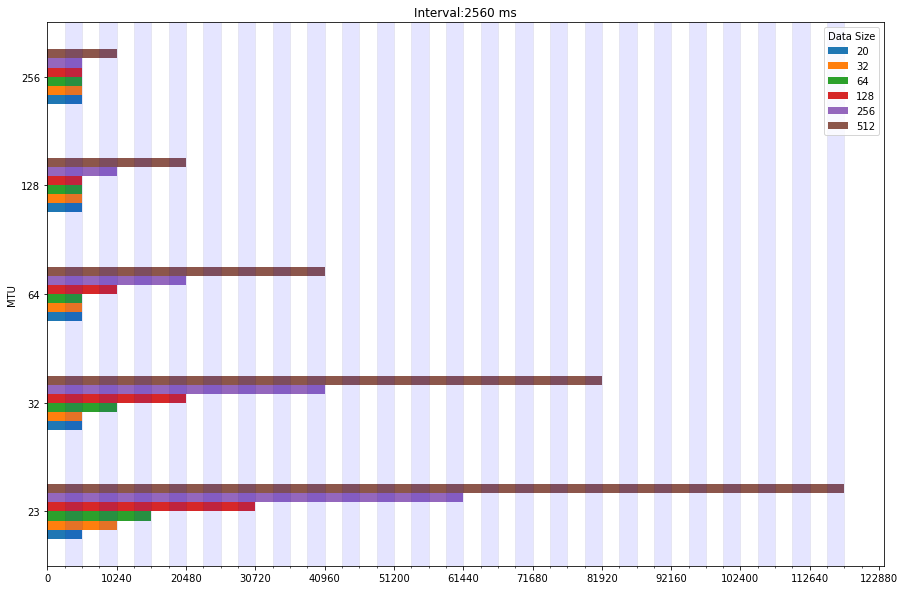

In [43]:
dfs =[(i,x) for i,x in df_original.groupby("Connection Interval in (hex,ms)")]
for interval,df in dfs:
    step = int(interval*1.25)
    print(step)
    df = df.drop(["Connection Interval in (hex,ms)"],axis=1)
    #df = df.set_index(["data_size",df.index % 4])
    #df = df.pivot(columns=["mtu_size"])
    df = df.groupby(["Data Size","MTU"]).min().reset_index().pivot(index="MTU",columns=["Data Size"],values="Duration in ms")
    
    subplot = df.plot(kind="barh",figsize=(15,10))
    subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step*4))
    subplot.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(step))
    subplot.set_title("Interval:%d ms"%int(interval*1.25))
    is_label_set = False
    for i in range(step,int(df.max().max()),step*2):
        rect = patches.Rectangle((i, -10), step, 512, linewidth=0.5, edgecolor='black', facecolor='blue',alpha=0.1)
        
        # Add the patch to the Axes
        subplot.add_patch(rect)
        #plt.vlines(i,-10,512)
    